## TEAM PARIS - LP3 - Classification Project (Customer Churn)

#### Introduction/Background
Customer attrition is one of the biggest expenditures of any
organization. Customer churn otherwise known as customer attrition or
customer turnover is the percentage of customers that stopped using your
company\'s product or service within a specified timeframe.\
For instance, if you began the year with **500 customers** but later ended
with **480 customers,** the percentage of customers that left would be **4%.**
If we could figure out why a customer leaves and when they leave with
reasonable accuracy, it would immensely help the organization to
strategize their retention initiatives manifold.

In this project, we aim to find the **likelihood of a customer leaving the
organization,** the **key indicators of churn** as well as **the retention
strategies** that can be implemented to avert this problem.

#### Hypothesis and Questions

#### Importing libraries

In [143]:
# Importing the required libraries

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
import glob

In [2]:
telco = pd.read_csv('Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
telco.shape

(7043, 21)

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### **_Using Pandas Profiling To Get A Quick Overiew Of The Data_**

#### Univariate Anlaysis

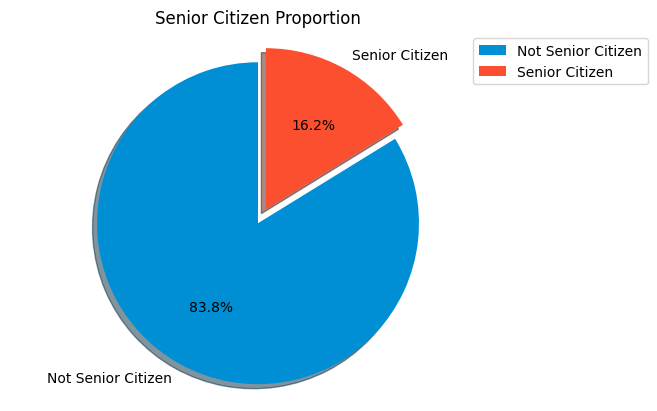

In [53]:
# Plotting Senior Citizen Proportion

senior_citizen_counts = telco['SeniorCitizen'].value_counts()
labels = ['Not Senior Citizen', 'Senior Citizen']
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
plt.pie(senior_citizen_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Senior Citizen Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()


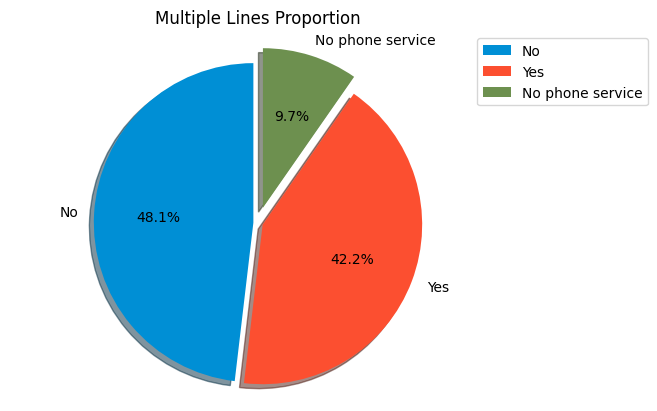

In [71]:
#Plotting the proportion of multiple lines

#multiple_lines_counts = telco['MultipleLines'].value_counts()
#plt.pie(multiple_lines_counts, labels=multiple_lines_counts.index, autopct='%1.1f%%')
#plt.title('Multiple Lines Proportion')
#plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
#plt.ylabel('')
#plt.show()

#Plotting the proportion of multiple lines

multiple_lines_counts = telco['MultipleLines'].value_counts()
labels = ['No', 'Yes', 'No phone service']
colors = ['#008fd5', '#fc4f30', '#6d904f']
explode = (0.03, 0.03, 0.1)
plt.pie(multiple_lines_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Multiple Lines Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()

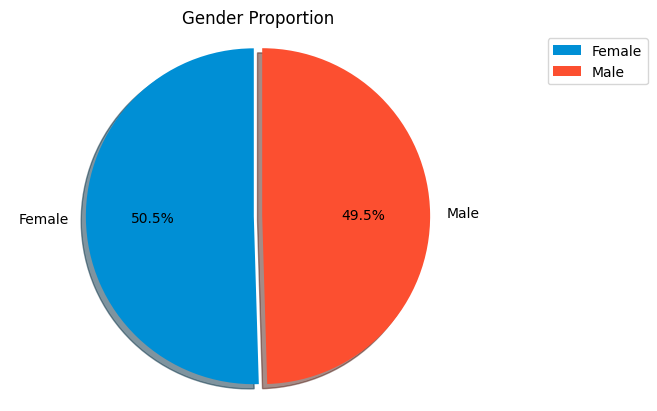

In [129]:
# Plotting Gender Proportion

gender_counts = telco['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.05)
plt.pie(gender_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Gender Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()



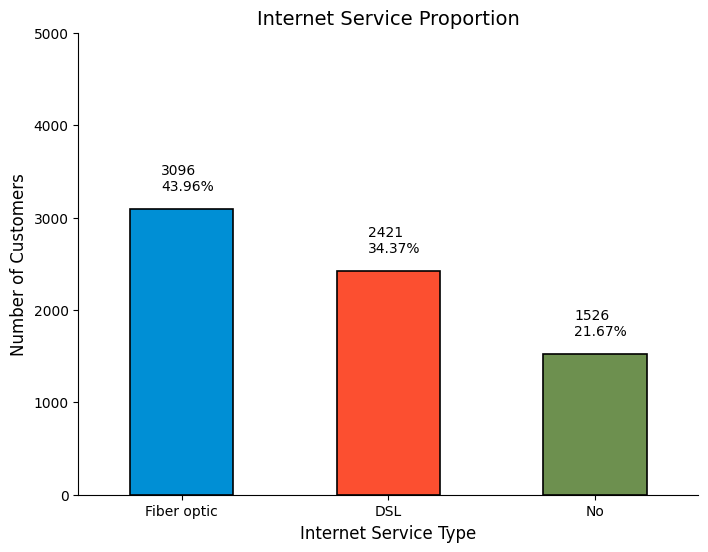

In [128]:
# Plotting the proportion of Internet Service Users

internet_service_counts = telco['InternetService'].value_counts()
labels = ['DSL', 'Fiber optic', 'No']
colors = ['#008fd5', '#fc4f30','#6d904f']
explode = (0.03, 0.03, 0.1)

percentages = round(internet_service_counts/internet_service_counts.sum()*100, 2).astype(str) + '%'

ax = internet_service_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, 
                                  figsize=(8,6), rot=0)
ax.set_title('Internet Service Proportion', fontsize=14)
ax.set_xlabel('Internet Service Type', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_ylim(0, 5000)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 200))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


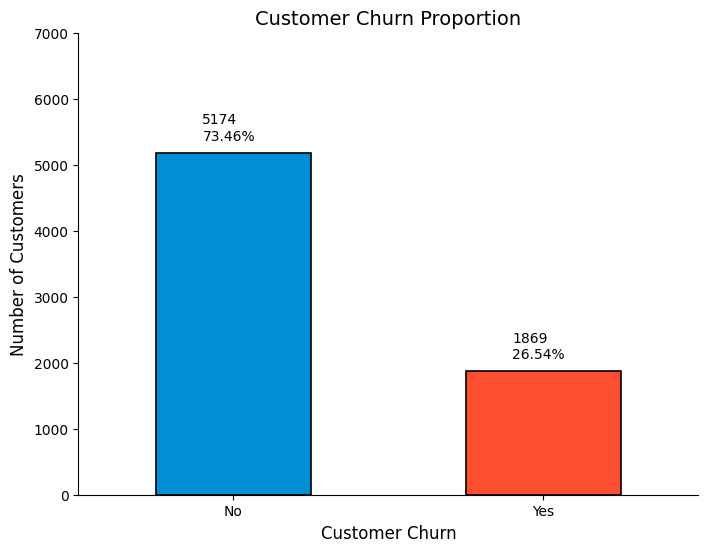

In [140]:
# Plotting the ratio of customer churn

customer_churn_counts = telco['Churn'].value_counts()
labels = ['No', 'Yes']
colors = ['#008fd5', '#fc4f30']
explode = (0.03, 0.03)

percentages = round(customer_churn_counts/customer_churn_counts.sum()*100, 2).astype(str) + '%'

ax = customer_churn_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, 
                                  figsize=(8,6), rot=0)
ax.set_title('Customer Churn Proportion', fontsize=14)
ax.set_xlabel('Customer Churn', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_ylim(0, 7000)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 200))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


#### Bivariate Analysis